In [26]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [28]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [29]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [30]:
tf.keras.backend.clear_session()

In [31]:
subject = 'Tocantins - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [32]:
data = pd.read_csv('2003_mo_model_input_TO.csv')
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data =data.drop([' NFSP - Fluxo Mensal (Milhões de reais)'], axis=1)
data

,Unnamed: 0,Tocantins- custo m2 (R$),Tocantins - Desemprego,Tocantins - IDH Educacao,Tocantins - IDH Longevidade,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),...,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),População,PPC (US$),Taxa Selic (%),Tocantins - IDH,Tocantins - Consumo de Cimento (t)
0,2003-1,11275.335200,8.243830,0.674633,0.766370,3.576410,978.531801,1343.371397,26.858971,18.470168,...,3.656420,0.969649,0.724032,11.520143,126.459809,1.772069e+08,169.247665,1.611498,0.700107,17.555
1,2003-2,11378.766738,8.237931,0.675135,0.766735,3.573972,978.532153,1343.394931,26.860534,18.468827,...,3.654697,0.950783,0.690297,11.189862,126.581813,1.773884e+08,170.176810,1.450389,0.700487,14.976
2,2003-3,11476.693775,8.232033,0.675638,0.767100,3.572551,978.532357,1343.408659,26.861445,18.468045,...,3.654266,0.938332,0.669681,10.820792,126.703818,1.775699e+08,171.135713,1.870184,0.700866,13.334
3,2003-4,11568.023775,8.226135,0.676140,0.767465,3.572398,978.532379,1343.410130,26.861543,18.467962,...,3.653595,0.926401,0.660494,10.417840,126.825822,1.777514e+08,172.116904,1.355287,0.701246,15.173
4,2003-5,11656.641017,8.220236,0.676642,0.767830,3.576238,978.439851,1339.493279,26.838338,18.686479,...,3.650266,0.951683,0.648337,9.959690,126.976217,1.779329e+08,173.072271,1.585538,0.701626,18.728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-5,36946.428021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2023-6,36910.472628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,2023-7,36863.430304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,2023-8,36780.869880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


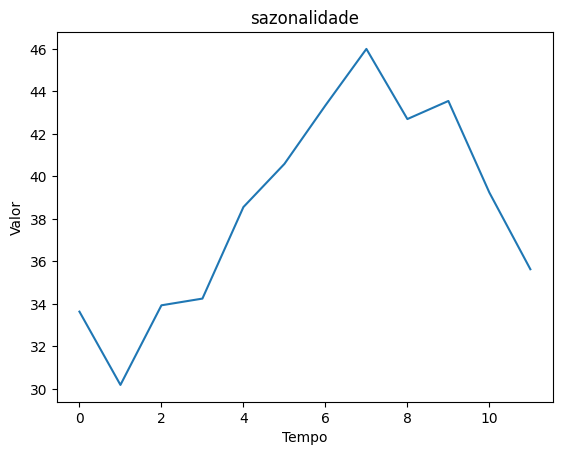

,sazonalidade
sazonalidade,
0,33.636260
1,30.187922
2,33.933686
3,34.249380
4,38.555589
5,40.585725
6,43.336277
7,45.995797
8,42.696094


In [33]:
def calculate_monthly_means(consume_of_cement, subject):
    df = pd.DataFrame({subject: consume_of_cement[:train_split]})
    df['sazonalidade'] = df.index % 12
    monthly_means = df.groupby('sazonalidade')[subject].mean()
    result_df = pd.DataFrame({'sazonalidade': monthly_means})

    return result_df

media_df = calculate_monthly_means(data[subject], subject)
plot_columns(media_df)
media_df

In [34]:
def fill_original_df_with_monthly_means(df_og, media_df):
    monthly_means = media_df['sazonalidade'].tolist()
    df_og['sazonalidade'] = [monthly_means[i % 12] for i in range(len(df_og))]
    return df_og

data = fill_original_df_with_monthly_means(data, media_df)
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data

,Unnamed: 0,Tocantins- custo m2 (R$),Tocantins - Desemprego,Tocantins - IDH Educacao,Tocantins - IDH Longevidade,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),...,INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),População,PPC (US$),Taxa Selic (%),Tocantins - IDH,sazonalidade,Tocantins - Consumo de Cimento (t)
0,2003-1,11275.335200,8.243830,0.674633,0.766370,3.576410,978.531801,1343.371397,26.858971,18.470168,...,0.969649,0.724032,11.520143,126.459809,1.772069e+08,169.247665,1.611498,0.700107,33.636260,17.555
1,2003-2,11378.766738,8.237931,0.675135,0.766735,3.573972,978.532153,1343.394931,26.860534,18.468827,...,0.950783,0.690297,11.189862,126.581813,1.773884e+08,170.176810,1.450389,0.700487,30.187922,14.976
2,2003-3,11476.693775,8.232033,0.675638,0.767100,3.572551,978.532357,1343.408659,26.861445,18.468045,...,0.938332,0.669681,10.820792,126.703818,1.775699e+08,171.135713,1.870184,0.700866,33.933686,13.334
3,2003-4,11568.023775,8.226135,0.676140,0.767465,3.572398,978.532379,1343.410130,26.861543,18.467962,...,0.926401,0.660494,10.417840,126.825822,1.777514e+08,172.116904,1.355287,0.701246,34.249380,15.173
4,2003-5,11656.641017,8.220236,0.676642,0.767830,3.576238,978.439851,1339.493279,26.838338,18.686479,...,0.951683,0.648337,9.959690,126.976217,1.779329e+08,173.072271,1.585538,0.701626,38.555589,18.728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-5,36946.428021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.555589,NaN
245,2023-6,36910.472628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.585725,NaN
246,2023-7,36863.430304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.336277,NaN
247,2023-8,36780.869880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.995797,NaN


In [35]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data

0      29.644
1      25.375
2      25.608
3      30.043
4      28.702
        ...  
244       NaN
245       NaN
246       NaN
247       NaN
248       NaN
Name: Tocantins - Consumo de Cimento (t), Length: 249, dtype: float64

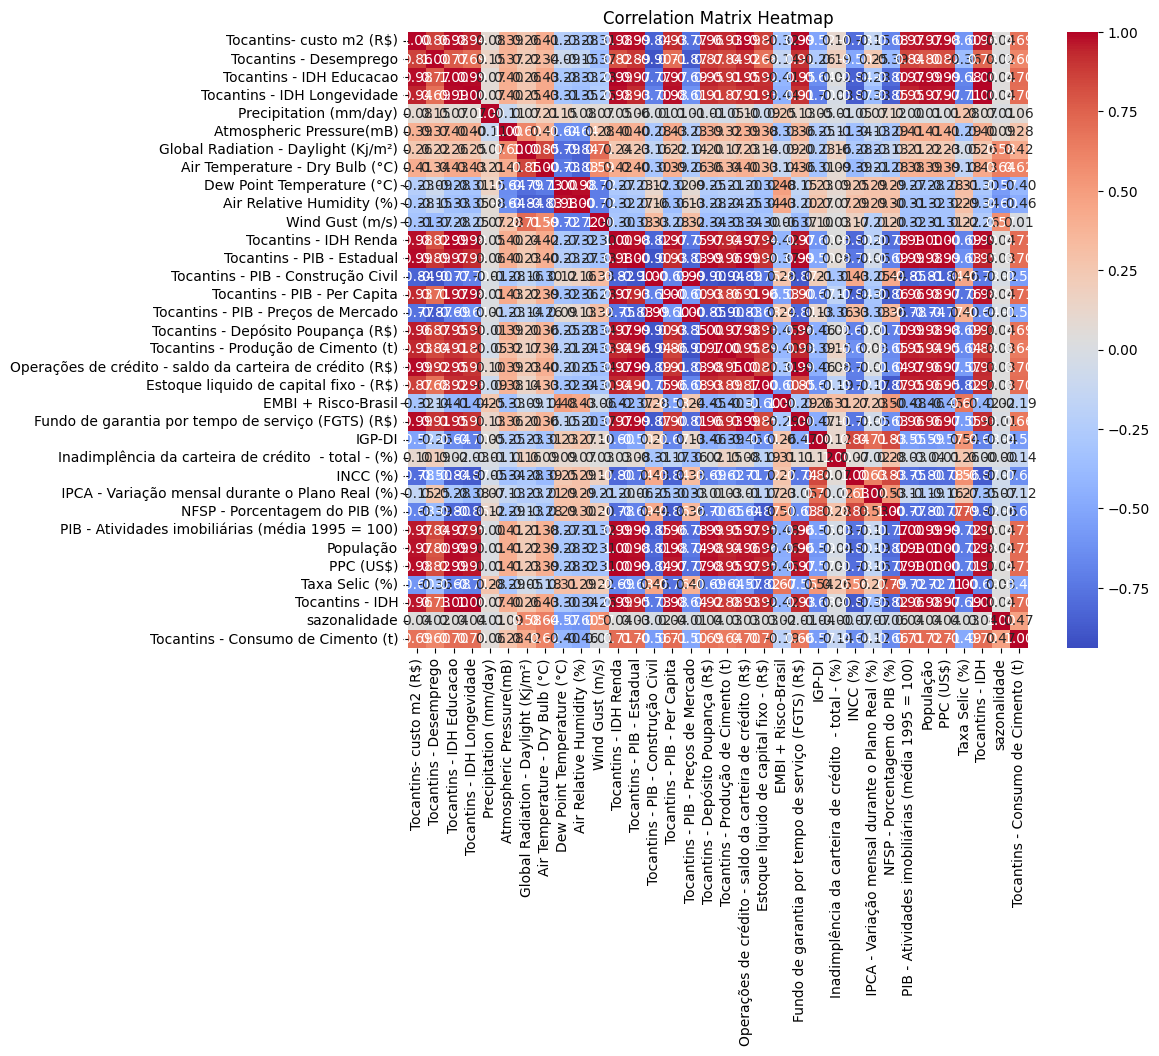

In [36]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

safe_data = data.iloc[:split_index + 1,1:-1]

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

def remove_high_vif_columns(dataframe, threshold=1000):
    i=0
    while True:
        vif_result = calculate_vif(dataframe)
        high_vif_column = vif_result.loc[vif_result["VIF"].idxmax()]["Feature"]
        
        if vif_result["VIF"].max() <= threshold:
            print(f"Num columns removed: {i}")
            return dataframe
        i += 1
        dataframe = dataframe.drop(high_vif_column, axis=1)

In [38]:
safe_data = data.iloc[:split_index + 1,1:-1]
vif_info = calculate_vif(safe_data)
vif_info

,Feature,VIF
0,Tocantins- custo m2 (R$),1.157671e+06
1,Tocantins - Desemprego,8.364824e+04
2,Tocantins - IDH Educacao,1.929396e+09
3,Tocantins - IDH Longevidade,2.536385e+09
4,Precipitation (mm/day),7.437118e+01
5,Atmospheric Pressure(mB),3.656677e+07
6,Global Radiation - Daylight (Kj/m²),4.945713e+03
7,Air Temperature - Dry Bulb (°C),1.160427e+05
8,Dew Point Temperature (°C),4.262310e+04
9,Air Relative Humidity (%),4.293375e+04


In [39]:
data = remove_high_vif_columns(safe_data, 10000000)
data

Num columns removed: 5


,Tocantins- custo m2 (R$),Tocantins - Desemprego,Tocantins - IDH Educacao,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),...,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),PPC (US$),Taxa Selic (%),sazonalidade
0,11275.335200,8.243830,0.674633,3.576410,978.531801,1343.371397,26.858971,18.470168,64.274735,1.922279,...,2.097001e+06,1.036534,3.656420,0.969649,0.724032,11.520143,126.459809,169.247665,1.611498,33.636260
1,11378.766738,8.237931,0.675135,3.573972,978.532153,1343.394931,26.860534,18.468827,64.266609,1.922184,...,2.000523e+06,0.993449,3.654697,0.950783,0.690297,11.189862,126.581813,170.176810,1.450389,30.187922
2,11476.693775,8.232033,0.675638,3.572551,978.532357,1343.408659,26.861445,18.468045,64.261870,1.922064,...,1.963278e+06,0.973020,3.654266,0.938332,0.669681,10.820792,126.703818,171.135713,1.870184,33.933686
3,11568.023775,8.226135,0.676140,3.572398,978.532379,1343.410130,26.861543,18.467962,64.261362,1.921914,...,1.954187e+06,0.940489,3.653595,0.926401,0.660494,10.417840,126.825822,172.116904,1.355287,34.249380
4,11656.641017,8.220236,0.676642,3.576238,978.439851,1339.493279,26.838338,18.686479,65.145668,1.897554,...,1.975493e+06,0.917493,3.650266,0.951683,0.648337,9.959690,126.976217,173.072271,1.585538,38.555589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,25130.878486,9.816747,0.730343,2.903880,978.888634,1531.929013,29.153662,14.883492,47.453443,2.028054,...,1.001735e+07,0.471521,3.683580,0.378150,0.366904,2.206994,196.778355,416.859692,0.583985,45.995797
176,25213.204738,9.805643,0.730352,2.986826,978.492834,1474.792267,28.859176,16.057094,52.112140,2.014577,...,9.868983e+06,0.476827,3.634735,0.377666,0.358935,2.215328,197.255170,417.748887,0.753312,42.696094
177,25295.393884,9.794539,0.730362,3.031371,978.129262,1413.095078,28.132069,17.858073,59.615154,1.678918,...,1.025520e+07,0.475427,3.545663,0.377838,0.354313,2.232466,197.731985,418.601189,0.882343,43.547233
178,25372.856751,9.783436,0.730372,3.194774,978.095176,1343.231617,27.231701,19.212454,66.792477,1.494901,...,1.073635e+07,0.491301,3.476080,0.370057,0.352728,2.263185,198.211712,419.430070,1.004174,39.237538


In [40]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
input_data

,Tocantins - Desemprego,Tocantins - IDH Educacao,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Tocantins - PIB - Estadual,...,EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),PPC (US$),Taxa Selic (%)
0,-0.679567,-2.047115,0.423571,-0.060162,-0.065804,-0.427511,-0.071414,0.021044,1.015878,-1.595053,...,-0.582539,-1.302390,3.921218,1.209036,3.214079,2.802383,4.268118,-1.845112,-1.798021,2.127040
1,-0.685602,-2.014756,0.420924,-0.059695,-0.065512,-0.425692,-0.072038,0.020156,1.015534,-1.578873,...,-0.792841,-1.336546,3.582946,1.203470,3.051841,2.402642,4.096014,-1.839712,-1.785942,1.562580
2,-0.691636,-1.982397,0.419381,-0.059423,-0.065341,-0.424631,-0.072402,0.019637,1.015104,-1.562692,...,-0.617643,-1.349731,3.422548,1.202078,2.944772,2.158351,3.903698,-1.834313,-1.773475,3.033368
3,-0.697671,-1.950039,0.419215,-0.059394,-0.065322,-0.424517,-0.072441,0.019582,1.014566,-1.546512,...,-0.152627,-1.352950,3.167136,1.199914,2.842174,2.049492,3.693727,-1.828913,-1.760719,1.229384
4,-0.703705,-1.917680,0.423385,-0.182370,-0.114062,-0.451525,0.029249,0.116271,0.927264,-1.530331,...,0.462644,-1.345407,2.986591,1.189162,3.059587,1.905441,3.454992,-1.822257,-1.748299,2.036088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.929673,1.541625,-0.306685,0.414090,2.280531,2.243345,-1.740513,-1.818172,1.394965,1.372537,...,-0.193815,1.501633,-0.514871,1.296737,-1.872446,-1.429358,-0.584804,1.266999,1.421090,-1.472938
176,0.918313,1.542248,-0.216619,-0.111951,1.569544,1.900586,-1.194364,-1.308797,1.346666,1.371742,...,-0.235540,1.449107,-0.473208,1.139013,-1.876611,-1.523783,-0.580461,1.288102,1.432650,-0.879688
177,0.906953,1.542870,-0.168251,-0.595161,0.801809,1.054285,-0.356259,-0.488428,0.143687,1.370946,...,-0.265681,1.585840,-0.484199,0.851392,-1.875135,-1.578548,-0.571531,1.309204,1.443731,-0.427616
178,0.895593,1.543492,0.009178,-0.640463,-0.067544,0.006321,0.274017,0.296330,-0.515813,1.370151,...,-0.285262,1.756179,-0.359568,0.626702,-1.942040,-1.597335,-0.555524,1.330436,1.454507,-0.000772


In [41]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Tocantins - Desemprego,Tocantins - IDH Educacao,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Tocantins - PIB - Estadual,...,EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),PPC (US$),Taxa Selic (%)
0,-0.679567,-2.047115,0.423571,-0.060162,-0.065804,-0.427511,-0.071414,0.021044,1.015878,-1.595053,...,-0.582539,-1.302390,3.921218,1.209036,3.214079,2.802383,4.268118,-1.845112,-1.798021,2.127040
1,-0.685602,-2.014756,0.420924,-0.059695,-0.065512,-0.425692,-0.072038,0.020156,1.015534,-1.578873,...,-0.792841,-1.336546,3.582946,1.203470,3.051841,2.402642,4.096014,-1.839712,-1.785942,1.562580
2,-0.691636,-1.982397,0.419381,-0.059423,-0.065341,-0.424631,-0.072402,0.019637,1.015104,-1.562692,...,-0.617643,-1.349731,3.422548,1.202078,2.944772,2.158351,3.903698,-1.834313,-1.773475,3.033368
3,-0.697671,-1.950039,0.419215,-0.059394,-0.065322,-0.424517,-0.072441,0.019582,1.014566,-1.546512,...,-0.152627,-1.352950,3.167136,1.199914,2.842174,2.049492,3.693727,-1.828913,-1.760719,1.229384
4,-0.703705,-1.917680,0.423385,-0.182370,-0.114062,-0.451525,0.029249,0.116271,0.927264,-1.530331,...,0.462644,-1.345407,2.986591,1.189162,3.059587,1.905441,3.454992,-1.822257,-1.748299,2.036088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.221600,1.520997,-0.082329,0.489278,1.578370,2.115409,-0.998699,-1.321968,0.303230,1.350541,...,0.731931,1.338281,-1.087000,1.252487,-1.491033,-0.960452,-0.676734,1.091879,1.261902,0.499090
164,1.179119,1.524252,-0.244451,-0.075279,1.083794,1.633521,-0.408211,-0.757243,-0.192511,1.356054,...,0.583095,1.318191,-0.904679,1.414483,-1.525186,-1.007966,-0.668750,1.100438,1.276272,0.323875
165,1.136637,1.527506,0.325621,-0.495707,0.575477,0.947940,0.094240,-0.181599,-0.773199,1.361567,...,0.433167,1.483470,-0.900134,1.498244,-1.546744,-0.976556,-0.657609,1.108997,1.290351,0.198030
166,1.094156,1.530761,0.563290,-0.526632,-0.273835,0.191562,0.508281,0.378808,-1.218861,1.367080,...,0.297965,1.703486,-1.136836,1.476356,-1.586381,-1.146834,-0.647588,1.117113,1.304501,0.502803


In [42]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      29.644
1      25.375
2      25.608
3      30.043
4      28.702
        ...  
163    38.793
164    38.281
165    39.711
166    33.695
167    28.206
Name: Tocantins - Consumo de Cimento (t), Length: 168, dtype: float64

In [43]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [44]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 26)

In [45]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Tocantins - Desemprego,Tocantins - IDH Educacao,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Tocantins - PIB - Estadual,...,EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),PPC (US$),Taxa Selic (%)
132,1.314607,0.671368,-0.278828,-0.305769,-1.603743,-1.604912,0.771985,1.091299,-1.649757,0.990289,...,-0.548487,1.079517,0.174628,-1.262693,-0.066954,1.530065,-0.366715,1.072212,0.878252,-0.590376
133,1.340875,0.665926,-0.353661,-0.187428,-1.521637,-1.439077,0.896271,1.129022,-1.830680,1.006274,...,-0.501591,0.954387,0.240832,-1.257770,-0.130652,1.649361,-0.350285,1.078438,0.887574,-0.476859
134,1.367142,0.660483,-0.337078,0.337655,-0.788631,-1.068042,0.747882,0.864508,-1.687691,1.022258,...,-0.487442,0.917313,0.176857,-1.179613,-0.079602,1.622916,-0.335122,1.084663,0.896990,-0.089952
135,1.393410,0.655040,-0.334607,1.096354,-0.231794,-0.645818,0.355480,0.403014,-1.191105,1.038243,...,-0.477666,0.905701,-0.005233,-1.150081,-0.034473,1.581460,-0.321950,1.090889,0.906245,-0.814200
136,1.419678,0.649597,-0.424071,1.564546,0.454980,-0.085614,-0.323436,-0.298586,-0.655033,1.054228,...,-0.476309,0.917044,0.097576,-1.102711,-0.177535,1.638292,-0.302995,1.095273,0.915208,-0.917944
137,1.445946,0.644154,-0.100174,1.755151,1.095592,0.462807,-0.770758,-0.799557,-0.214828,1.070213,...,-0.468224,0.926784,0.431487,-1.100246,-0.208868,1.643773,-0.290554,1.099656,0.924126,-0.708692
138,1.472213,0.638712,0.081710,1.582847,1.435102,0.930197,-0.946604,-1.038923,0.042075,1.086198,...,-0.449308,0.951808,0.482414,-1.083821,-0.245300,1.704584,-0.281926,1.104040,0.932114,-0.496126
139,1.498481,0.633269,0.223200,0.840681,1.226617,1.020601,-0.693106,-0.839465,-0.249031,1.102183,...,-0.429479,0.970898,0.657043,-1.080043,-0.333490,1.841703,-0.275931,1.104434,0.939863,-0.251065
140,1.524749,0.627826,0.397129,0.346516,0.672619,0.734135,-0.173901,-0.353287,-0.615554,1.118168,...,-0.410867,0.982071,0.678386,-1.159959,-0.296846,1.837218,-0.271466,1.104827,0.947944,-0.593206
141,1.551017,0.622383,0.203274,0.196653,0.226560,0.229527,0.238949,0.126195,-0.881953,1.134152,...,-0.384008,1.141593,0.727143,-1.291433,-0.292462,1.797860,-0.273241,1.105221,0.956229,-0.100794


In [46]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 26)

In [47]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [48]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(36, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(144, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.07,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [49]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [50]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[1889219665, 1289640232, 506703895, 887043194, 3898586245, 2949702243, 3517232246, 1648207492, 1041877627, 740536759]


Step: 0 ___________________________________________
val_loss: 15.151285171508789
winner_seed: 1889219665


Step: 1 ___________________________________________
val_loss: 12.488546371459961
winner_seed: 1289640232


Step: 2 ___________________________________________
val_loss: 13.962307929992676


Step: 3 ___________________________________________
val_loss: 9.944104194641113
winner_seed: 887043194


Step: 4 ___________________________________________
val_loss: 13.436711311340332


Step: 5 ___________________________________________
val_loss: 13.165243148803711


Step: 6 ___________________________________________
val_loss: 16.11830711364746


Step: 7 ___________________________________________
val_loss: 14.253146171569824


Step: 8 ___________________________________________
val_loss: 14.252741813659668


Step: 9 ___________________________________________
val_loss: 16

In [51]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)
# 887043194

Epoch 1/10000
4/4 [==============================] - 2s 126ms/step - loss: 1407.0209 - val_loss: 65.4141
Epoch 2/10000
4/4 [==============================] - 0s 11ms/step - loss: 55.2279 - val_loss: 81.4543
Epoch 3/10000
4/4 [==============================] - 0s 11ms/step - loss: 52.5860 - val_loss: 86.3428
Epoch 4/10000
4/4 [==============================] - 0s 10ms/step - loss: 50.7178 - val_loss: 77.1094
Epoch 5/10000
4/4 [==============================] - 0s 10ms/step - loss: 50.5846 - val_loss: 183.0459
Epoch 6/10000
4/4 [==============================] - 0s 10ms/step - loss: 50.9388 - val_loss: 100.9708
Epoch 7/10000
4/4 [==============================] - 0s 10ms/step - loss: 43.9994 - val_loss: 145.9516
Epoch 8/10000
4/4 [==============================] - 0s 10ms/step - loss: 44.4087 - val_loss: 70.1326
Epoch 9/10000
4/4 [==============================] - 0s 10ms/step - loss: 43.4028 - val_loss: 115.4895
Epoch 10/10000
4/4 [==============================] - 0s 11ms/step - loss: 

4/4 [==============================] - 0s 11ms/step - loss: 11.2822 - val_loss: 21.0786
Epoch 160/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.0517 - val_loss: 14.8540
Epoch 161/10000
4/4 [==============================] - 0s 11ms/step - loss: 12.9396 - val_loss: 14.2046
Epoch 162/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.9590 - val_loss: 17.8172
Epoch 163/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.0326 - val_loss: 17.7738
Epoch 164/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.5393 - val_loss: 14.5744
Epoch 165/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.7256 - val_loss: 13.6682
Epoch 166/10000
4/4 [==============================] - 0s 11ms/step - loss: 10.8149 - val_loss: 25.1201
Epoch 167/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.7193 - val_loss: 17.5638
Epoch 168/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.7522 - v

4/4 [==============================] - 0s 10ms/step - loss: 7.3940 - val_loss: 13.3314
Epoch 318/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.3318 - val_loss: 13.8713
Epoch 319/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.7565 - val_loss: 13.2369
Epoch 320/10000
4/4 [==============================] - 0s 12ms/step - loss: 6.4985 - val_loss: 13.2175
Epoch 321/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.9228 - val_loss: 13.4765
Epoch 322/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.2408 - val_loss: 13.1479
Epoch 323/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.1653 - val_loss: 12.8561
Epoch 324/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.1754 - val_loss: 13.6856
Epoch 325/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.8995 - val_loss: 14.4765
Epoch 326/10000
4/4 [==============================] - 0s 10ms/step - loss: 9.4529 - val_

4/4 [==============================] - 0s 12ms/step - loss: 6.7062 - val_loss: 12.1545
Epoch 476/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.2512 - val_loss: 12.3615
Epoch 477/10000
4/4 [==============================] - 0s 12ms/step - loss: 6.4868 - val_loss: 12.2555
Epoch 478/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.5657 - val_loss: 12.3734
Epoch 479/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.3696 - val_loss: 12.4102
Epoch 480/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.1875 - val_loss: 12.1673
Epoch 481/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.0975 - val_loss: 12.5730
Epoch 482/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.2795 - val_loss: 12.1789
Epoch 483/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.1984 - val_loss: 12.2277
Epoch 484/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.6856 - val_l

4/4 [==============================] - 0s 10ms/step - loss: 7.0821 - val_loss: 18.4465
Epoch 634/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.7906 - val_loss: 13.7499
Epoch 635/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.1796 - val_loss: 18.7265
Epoch 636/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.6687 - val_loss: 14.7039
Epoch 637/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.0089 - val_loss: 12.7426
Epoch 638/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.0448 - val_loss: 17.6303
Epoch 639/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.3051 - val_loss: 13.5488
Epoch 640/10000
4/4 [==============================] - 0s 12ms/step - loss: 6.0793 - val_loss: 17.4514
Epoch 641/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.2534 - val_loss: 18.1825
Epoch 642/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.3860 - val_l

Epoch 713/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.0086 - val_loss: 14.0661
Epoch 714/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.3369 - val_loss: 12.5264
Epoch 715/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.9928 - val_loss: 15.9296
Epoch 716/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.2201 - val_loss: 12.1785
Epoch 717/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.6703 - val_loss: 14.7735
Epoch 718/10000
4/4 [==============================] - 0s 8ms/step - loss: 5.6646 - val_loss: 17.0172
Epoch 719/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.1682 - val_loss: 14.7596
Epoch 720/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.2597 - val_loss: 12.3358
Epoch 721/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.5528 - val_loss: 14.2092
Epoch 722/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.3707 

Epoch 793/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.5536 - val_loss: 17.0939
Epoch 794/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.5119 - val_loss: 16.2448
Epoch 795/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.5327 - val_loss: 11.6999
Epoch 796/10000
4/4 [==============================] - 0s 12ms/step - loss: 5.7060 - val_loss: 11.5643
Epoch 797/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.3898 - val_loss: 12.5664
Epoch 798/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.9491 - val_loss: 11.9752
Epoch 799/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.3078 - val_loss: 12.9367
Epoch 800/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.3716 - val_loss: 12.3042
Epoch 801/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.6739 - val_loss: 11.3152
Epoch 802/10000
4/4 [==============================] - 0s 10ms/step - los

4/4 [==============================] - 0s 10ms/step - loss: 4.6301 - val_loss: 11.3795
Epoch 952/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.7388 - val_loss: 11.1182
Epoch 953/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.2840 - val_loss: 12.1188
Epoch 954/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.2378 - val_loss: 13.9455
Epoch 955/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.8264 - val_loss: 10.9256
Epoch 956/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.5374 - val_loss: 13.2204
Epoch 957/10000
4/4 [==============================] - 0s 12ms/step - loss: 4.5832 - val_loss: 12.3920
Epoch 958/10000
4/4 [==============================] - 0s 12ms/step - loss: 5.1438 - val_loss: 16.7099
Epoch 959/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.5539 - val_loss: 12.5829
Epoch 960/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.4389 - val_

Epoch 1109/10000
4/4 [==============================] - 0s 13ms/step - loss: 4.4848 - val_loss: 10.9161
Epoch 1110/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.7946 - val_loss: 13.9597
Epoch 1111/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.6933 - val_loss: 14.7378
Epoch 1112/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.2903 - val_loss: 16.4588
Epoch 1113/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.5132 - val_loss: 17.3164
Epoch 1114/10000
4/4 [==============================] - 0s 12ms/step - loss: 3.6769 - val_loss: 14.4755
Epoch 1115/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.6449 - val_loss: 15.5526
Epoch 1116/10000
4/4 [==============================] - 0s 9ms/step - loss: 3.7821 - val_loss: 13.8931
Epoch 1117/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.1013 - val_loss: 13.2610
Epoch 1118/10000
4/4 [==============================] - 0s 11ms/s

Epoch 1188/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.9993 - val_loss: 14.7001
Epoch 1189/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.9223 - val_loss: 15.2091
Epoch 1190/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.3554 - val_loss: 14.0232
Epoch 1191/10000
4/4 [==============================] - 0s 9ms/step - loss: 4.1255 - val_loss: 14.6614
Epoch 1192/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.9524 - val_loss: 15.9230
Epoch 1193/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.0402 - val_loss: 16.5140
Epoch 1194/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.3241 - val_loss: 14.0422
Epoch 1195/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.6480 - val_loss: 13.6676
Epoch 1196/10000
4/4 [==============================] - 0s 12ms/step - loss: 3.9087 - val_loss: 13.7164
Epoch 1197/10000
4/4 [==============================] - 0s 11ms/s

Epoch 1267/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.8338 - val_loss: 11.9508
Epoch 1268/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.3125 - val_loss: 14.3484
Epoch 1269/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.9106 - val_loss: 13.1882
Epoch 1270/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.1074 - val_loss: 13.2462
Epoch 1271/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.4865 - val_loss: 15.0730
Epoch 1272/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.3682 - val_loss: 16.5736
Epoch 1273/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.8364 - val_loss: 11.9752
Epoch 1274/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.1197 - val_loss: 14.9109
Epoch 1275/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.4803 - val_loss: 11.8962
Epoch 1276/10000
4/4 [==============================] - 0s 10ms/

Epoch 1346/10000
4/4 [==============================] - 0s 13ms/step - loss: 3.7316 - val_loss: 13.4868
Epoch 1347/10000
4/4 [==============================] - 0s 13ms/step - loss: 3.0159 - val_loss: 12.3886
Epoch 1348/10000
4/4 [==============================] - 0s 12ms/step - loss: 3.8239 - val_loss: 13.8027
Epoch 1349/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.6301 - val_loss: 12.9790
Epoch 1350/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.3842 - val_loss: 15.2968
Epoch 1351/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.5551 - val_loss: 15.2917
Epoch 1352/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.6507 - val_loss: 16.5916
Epoch 1353/10000
4/4 [==============================] - 0s 12ms/step - loss: 3.4279 - val_loss: 13.7209
Epoch 1354/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.6257 - val_loss: 14.4189
Epoch 1355/10000
4/4 [==============================] - 0s 11ms/

In [52]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [53]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 17ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,31.008511,31.833761,32.119053,34.350693,36.796227,40.799011,43.438404,43.901028,43.483017,42.791,41.166367,38.267673
Target,31.615,30.275,29.568,26.94,35.91,33.954,37.983,40.046,32.647,39.065,36.18,28.749
Error,0.606489,1.558762,2.551052,7.410692,0.886227,6.845013,5.455402,3.855026,10.836018,3.726002,4.986366,9.518673


In [54]:
display(mae)
display(mape)

4.852977

0.14953405

In [55]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [56]:
errors, mae, mape = year_mae_mape_calculator(trained_model,
                                             reshaped_test, 
                                             reshaped_test_target,
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 16ms/step
Ano-11: |Prediction[[459.95474]] - Target[402.932]| =  Error: [[57.022736]]; MAPE:[[0.1415195]]


[array([[57.022736]], dtype=float32)]

57.022736

0.1415195